Name: Bor-Sheng Huang  
Github Username: borsheng  
USC ID: 9589131162  

## 1. Combined Cycle Power Plant Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

### (b) Exploring the data:  
#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?


In [2]:
# read the excel data
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', names=['AT', 'V', 'AP', 'RH', 'PE'])
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


There are 9568 rows and 5 columns in the data set.   
Each row depicts the plant's average data over an hour, while each column signifies a specific attribute of the plant.

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

/Users/erichuang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


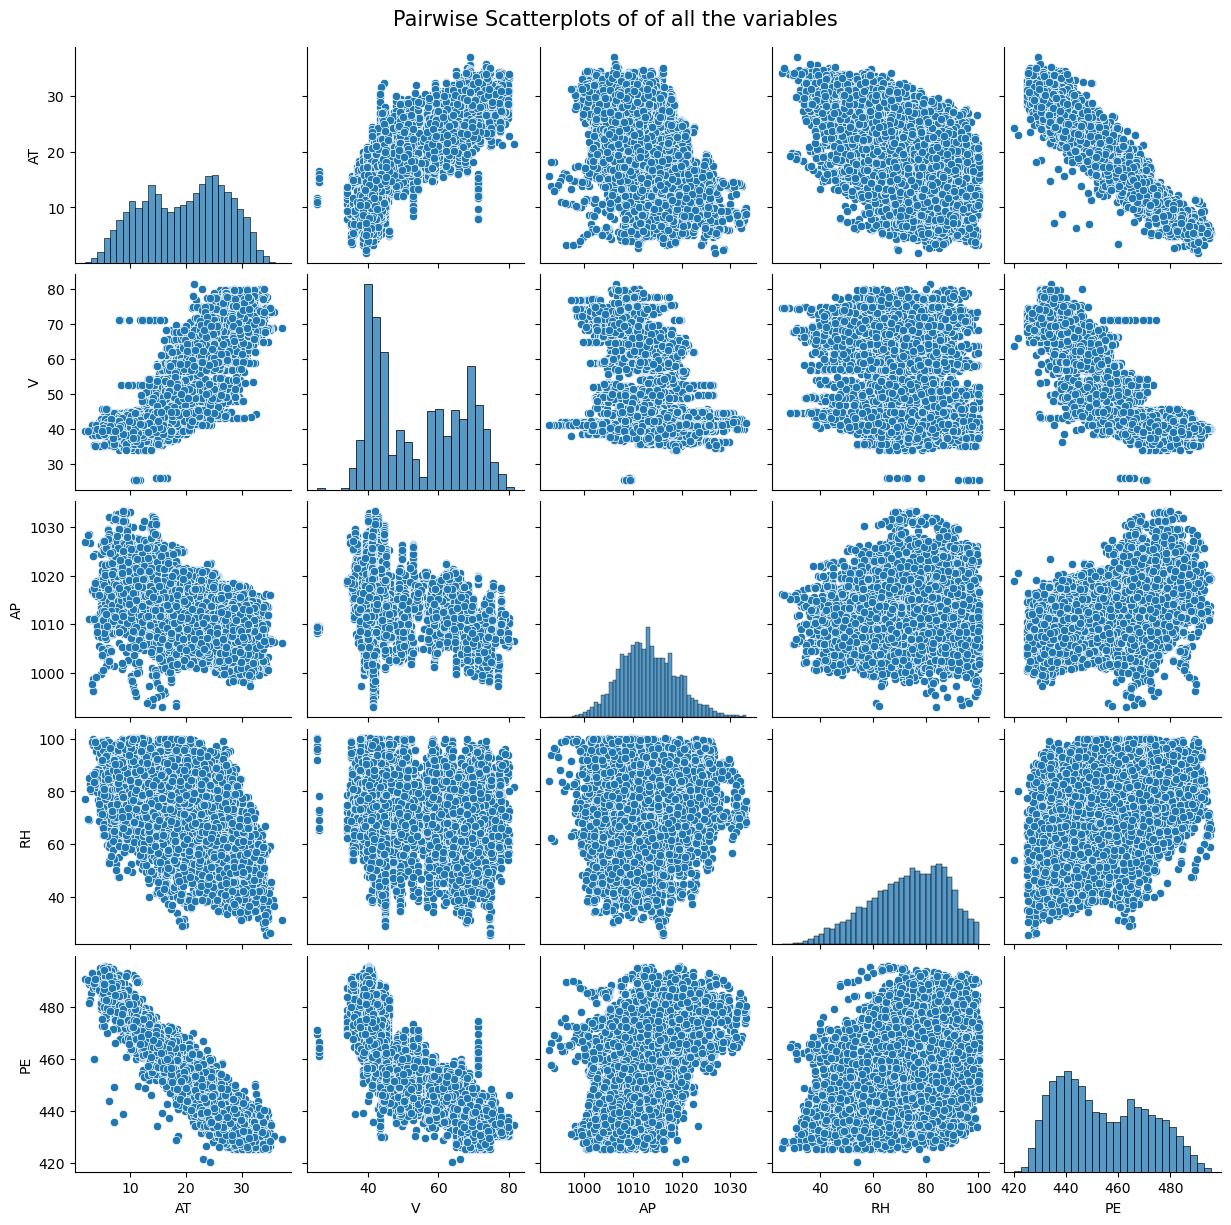

In [3]:
scatterplots = sns.pairplot(df)
plt.subplots_adjust(top=0.95)
scatterplots.fig.suptitle('Pairwise Scatterplots of of all the variables', fontsize=15)
plt.show(scatterplots)

My findings:   
Feature PE is more correlated to feature AT and feature V.

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
stats = pd.DataFrame()

stats['Mean'] = df.mean()
stats['Median'] = df.median()
stats['Range'] = df.max() - df.min()
stats['First Quartiles'] = df.quantile(0.25)
stats['Third Quartiles'] = df.quantile(0.75)
stats['Interquartile Ranges'] = stats['Third Quartiles'] - stats['First Quartiles']
stats

,Mean,Median,Range,First Quartiles,Third Quartiles,Interquartile Ranges
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157


/Users/erichuang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


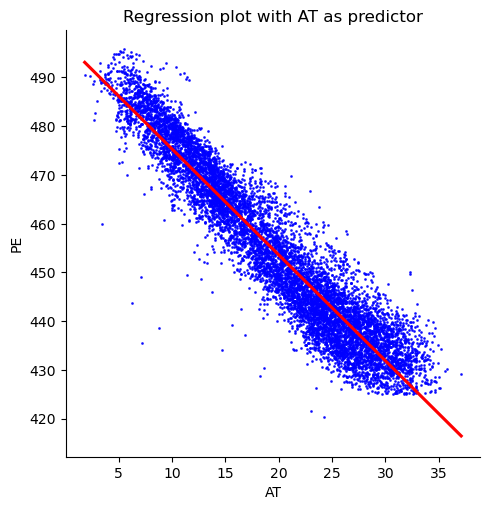

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155


/Users/erichuang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


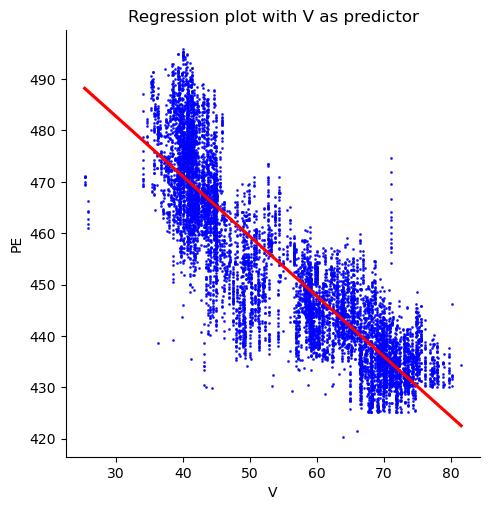

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539


/Users/erichuang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


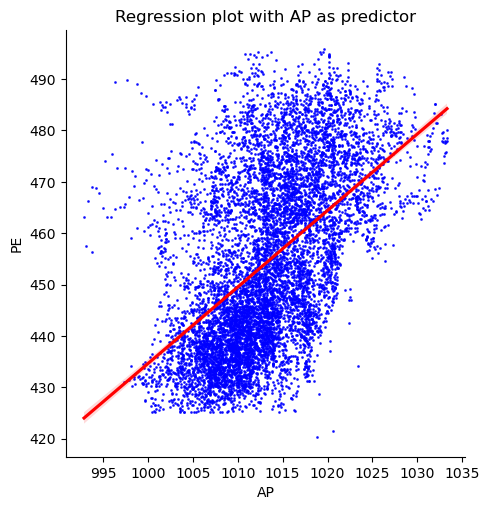

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477


/Users/erichuang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


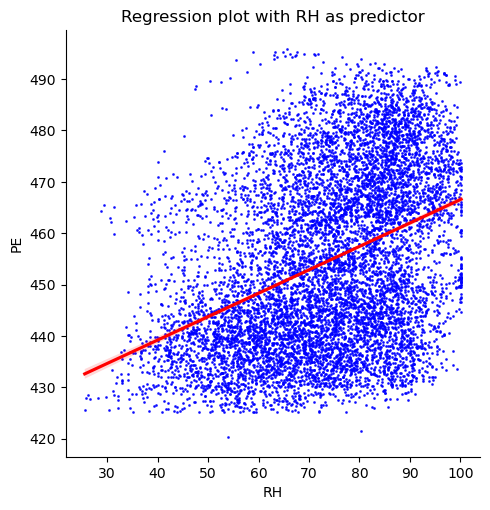

In [5]:
predictors = ['AT', 'V', 'AP', 'RH']
simple_cofficient = []

for predictor in predictors:
    X = df[predictor]
    y = df['PE']
    
    # add a constant to the predictor
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    # add to simple cofficient 
    simple_cofficient.append(model.params[predictor])
    summary = model.summary().tables[1]
    print(summary)
    
    # plot the data and regression line
    sns.lmplot(x=predictor, y='PE', data=df, line_kws={'color': 'red'}, scatter_kws={'s': 1, 'color': 'blue'})
    plt.title(f"Regression plot with {predictor} as predictor")
    plt.show()

All four predictors are statistically significant given that their p-values are less than 0.05. Regarding outliers, a few points can be observed in the bottom-left corner of the AT and PE plot. Additionally, in the V and PE graph, some points appear as outliers when V is either above 70 or below 30.

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?


In [6]:
X_muti = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# add a constant to the predictors
X_muti = sm.add_constant(X_muti)
model_muti = sm.OLS(y, X_muti).fit()
multi_cofficient = model_muti.params[1:].values
# print the summary
summary = model_muti.summary().tables[1]
print(summary)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150


All predictors can reject the null hypothesis from the above table.

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

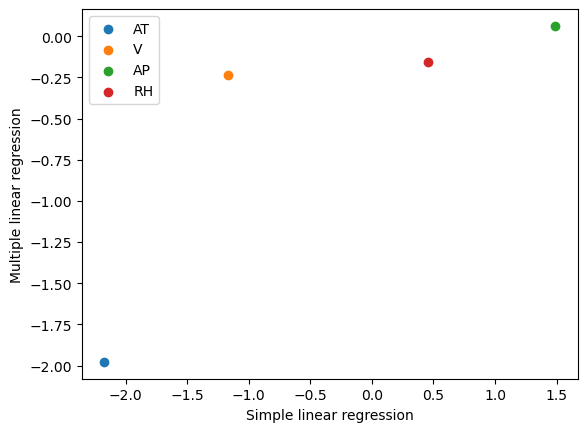

In [7]:
for i in range(0,4):
    plt.scatter(simple_cofficient[i], multi_cofficient[i], label=predictors[i])
plt.xlabel('Simple linear regression')
plt.ylabel('Multiple linear regression')
plt.legend()
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = (β0) +(β1)X+(β2)X^2 +(β3)X^3 +ε

In [8]:
for predictor in predictors:
    
    # polynomial
    poly = PolynomialFeatures(3)
    X = df[predictor].to_numpy()
    X = X.reshape(-1, 1)
    df_poly = poly.fit_transform(X)
    X = pd.DataFrame(df_poly)
    X = sm.add_constant(X)
    X.columns = ['const', 'X', 'X^2', 'X^3']
    y = df['PE']
    model = sm.OLS(y, X).fit()

    # print the summary
    print(f"Regression results for {predictor}")
    print(model.summary().tables[1])
    print("\n")

Regression results for AT
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
X             -0.6103      0.124     -4.941      0.000      -0.852      -0.368
X^2           -0.1251      0.007    -18.199      0.000      -0.139      -0.112
X^3            0.0027      0.000     22.594      0.000       0.002       0.003


Regression results for V
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
X             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
X^2           -0.0027      0.009     -0.294      0.768      -0.021       0.015
X^3            0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000

There are nonlinear associations between all predictors and the response.

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [9]:
# create interaction terms using polynomiaFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
df_poly = poly.fit_transform(df[predictors])
X = pd.DataFrame(df_poly)
X = sm.add_constant(X)
X.columns = ['const', 'AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*PH']
y = df['PE']
model = sm.OLS(y, X).fit()

# print the result
print("Regression results with interaction:")
interaction_results = model.summary().tables[1].data
headers = interaction_results[0]
print(tabulate([row for row in interaction_results[1:]], headers=headers, tablefmt = 'psql'))

Regression results with interaction:
+-------+----------+-----------+--------+---------+----------+----------+
|       |     coef |   std err |      t |   P>|t| |   [0.025 |   0.975] |
|-------+----------+-----------+--------+---------+----------+----------|
| const | 685.783  |    78.64  |  8.721 |   0     |  531.631 |  839.934 |
| AT    |  -4.347  |     2.373 | -1.832 |   0.067 |   -8.999 |    0.305 |
| V     |  -7.6749 |     1.351 | -5.682 |   0     |  -10.323 |   -5.027 |
| AP    |  -0.1524 |     0.077 | -1.983 |   0.047 |   -0.303 |   -0.002 |
| RH    |   1.5709 |     0.773 |  2.031 |   0.042 |    0.055 |    3.087 |
| AT*V  |   0.021  |     0.001 | 23.338 |   0     |    0.019 |    0.023 |
| AT*AP |   0.0018 |     0.002 |  0.752 |   0.452 |   -0.003 |    0.006 |
| AT*RH |  -0.0052 |     0.001 | -6.444 |   0     |   -0.007 |   -0.004 |
| V*AP  |   0.0068 |     0.001 |  5.135 |   0     |    0.004 |    0.009 |
| V*RH  |   0.0008 |     0     |  1.716 |   0.086 |   -0     |    0.002 |
|

There are association of interactions between all predictors and the response except AT * AP and V * RH.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [10]:
X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

# base model with all predictors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
base_model = sm.OLS(y_train, X_train).fit()
y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)
mse_train_basic = mean_squared_error(y_train, y_train_pred)
mse_test_basic = mean_squared_error(y_test, y_test_pred)

# polynomial model with possible insteractions and nonlinearities
poly = PolynomialFeatures(3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = np.delete(X_poly, 12, 1)
X_poly = np.delete(X_poly, 9, 1)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
poly_model = sm.OLS(y_train, X_train).fit()
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)
mse_train_poly = mean_squared_error(y_train, y_train_pred)
mse_test_poly = mean_squared_error(y_test, y_test_pred)

print(f"Base model (all predictors) training MSE: {mse_train_basic:.4f}")
print(f"Base model (all predictors) testing MSE: {mse_test_basic:.4f}")
print(f"Polynomial model (with interaction) training MSE: {mse_train_poly:.4f}")
print(f"Polynomial model (with interaction) testing MSE: {mse_test_poly:.4f}")

Base model (all predictors) training MSE: 20.5808
Base model (all predictors) testing MSE: 21.2399
Polynomial model (with interaction) training MSE: 18.0302
Polynomial model (with interaction) testing MSE: 18.6857


### (i) KNN Regression: Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

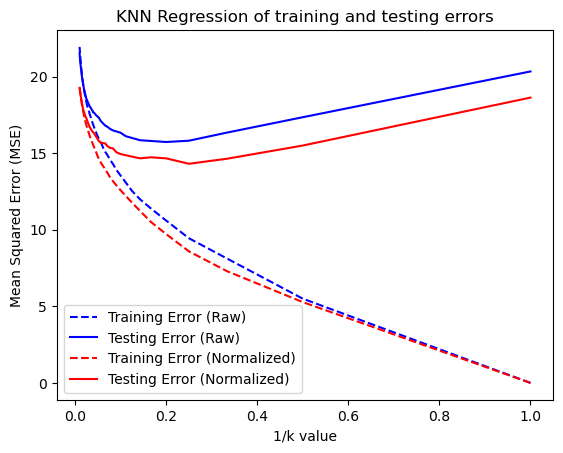

The best k for raw feature is 5
The best k for normalized feature is 4


In [11]:
train_errors, test_errors, train_errors_normalize, test_errors_normalize = [], [], [], []
k_values = range(1, 101, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# normalizing the data
scaler = StandardScaler()
X_train_normalize = scaler.fit_transform(X_train)
X_test_normalize = scaler.transform(X_test)

for k in k_values:
    # for raw features
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, knn.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, knn.predict(X_test)))   
    # for normalized features
    knn.fit(X_train_normalize, y_train)
    train_errors_normalize.append(mean_squared_error(y_train, knn.predict(X_train_normalize)))
    test_errors_normalize.append(mean_squared_error(y_test, knn.predict(X_test_normalize)))

# plot the errors
plt.plot(1/np.array(k_values), train_errors, label="Training Error (Raw)", color="blue", linestyle='--')
plt.plot(1/np.array(k_values), test_errors, label="Testing Error (Raw)", color="blue")
plt.plot(1/np.array(k_values), train_errors_normalize, label="Training Error (Normalized)", color="red", linestyle='--')
plt.plot(1/np.array(k_values), test_errors_normalize, label="Testing Error (Normalized)", color="red")
plt.xlabel("1/k value")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Regression of training and testing errors")
plt.legend()
plt.show()

# show the best k
min_error = test_errors.index(min(test_errors))
best_k = k_values[min_error]
print("The best k for raw feature is " + str(best_k))
min_error_normalize = test_errors_normalize.index(min(test_errors_normalize))
best_k_nor = k_values[min_error_normalize]
print("The best k for normalized feature is " + str(best_k_nor))

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [12]:
knn.n_neighbors = best_k
knn.fit(X_train, y_train)
mse_test_knn = mean_squared_error(y_test, knn.predict(X_test))

print(f"Linear base model (all predictors) testing MSE: {mse_test_basic:.4f}")
print(f"Linear polynomial model (with interaction) Testing MSE: {mse_test_poly:.4f}")
print(f"KNN regression model testing MSE: {mse_test_knn:.4f}")

Linear base model (all predictors) testing MSE: 21.2399
Linear polynomial model (with interaction) Testing MSE: 18.6857
KNN regression model testing MSE: 15.7268


The mean squared error (MSE) of KNN regression is lower than linear regression. That means KNN has the better result. It could indicate that there are non-linear patterns in the data so that KNN is capturing better.

## 2. ISLR: 2.4.1

(a) Better: A large sample size allows a more flexible to fit the data more effectively.  
(b) Worse: A flexible model might overfit.   
(c) Better: Flexible methods have better performances with non-linear datasets.   
(d) Worse: A flexible model might overfit. If the error term variance is high, the data points will deviate significantly from the optimal function $f$.

## 3. ISLR: 2.4.7

(a) We can use Pythagorean theorem to calculate the Euclidean distance.  
$$d(p,q) = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + (p_3-q_3)^2}$$  
&nbsp;&nbsp;&nbsp;&nbsp; The Euclidean distance between each observation and the test point:  
&nbsp;&nbsp;&nbsp;&nbsp; d(1,test) = 3  
&nbsp;&nbsp;&nbsp;&nbsp; d(2,test) = 2  
&nbsp;&nbsp;&nbsp;&nbsp; d(3,test) = 3.16  
&nbsp;&nbsp;&nbsp;&nbsp; d(4,test) = 2.24  
&nbsp;&nbsp;&nbsp;&nbsp; d(5,test) = 1.41  
&nbsp;&nbsp;&nbsp;&nbsp; d(6,test) = 1.73  

(b) Green: Nearest observation is green.

(c) Red: Neraest three observation is green, red, red. Red has 2 and green has 1. So the prediction is red.

(d) Small: Smaller value for K results in a flexible KNN model, which lead to a decision boundary that is non-linear.